<a href="https://colab.research.google.com/github/gcv-silva/Anotacoes-da-IC/blob/main/an%C3%A1lise_exploratoria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

## **Programa de Iniciação Científica e Mestrado | PICME-UEL**
### Programa de Pós-Graduação em Matemática Aplicada e Computacional (PGMAC-UEL)

<br>

### **Aluno (bolsista):** Gustavo Correa Vieira Silva
### **Orientador:** Prof. Dr. Rodrigo Rossetto Pescim

<br>

### **Livros Utilizados:**
1. MORETTIN, Pedro Alberto; BUSSAB, Wilton de Oliveira. *Estatística Básica*. 6. ed. São Paulo: Saraiva, 2010.
2. MORETTIN, Pedro Alberto; SINGER, Julio Marcos. *Estatística e Ciência de Dados*. São Paulo, abril de 2021.
3. CASTANHEIRA, Nelson Pereira. *Estatística aplicada a todos os níveis*. Curitiba: Ibpex, 2008.
4. ASSIS, Janilson Pinheiro de; SOUSA, Roberto Pequeno de; DIAS, Carlos Tadeu dos Santos. *Glossário de estatística*. Mossoró: EdUFERSA, 2019. <br>

### **Cursos Complementares:**
1. SANTOS, Rafael Fernandes Vieira Correia. *Estatística Descritiva com Python*. Disponível em: https://www.udemy.com/course/estatistica-descritiva-com-python/

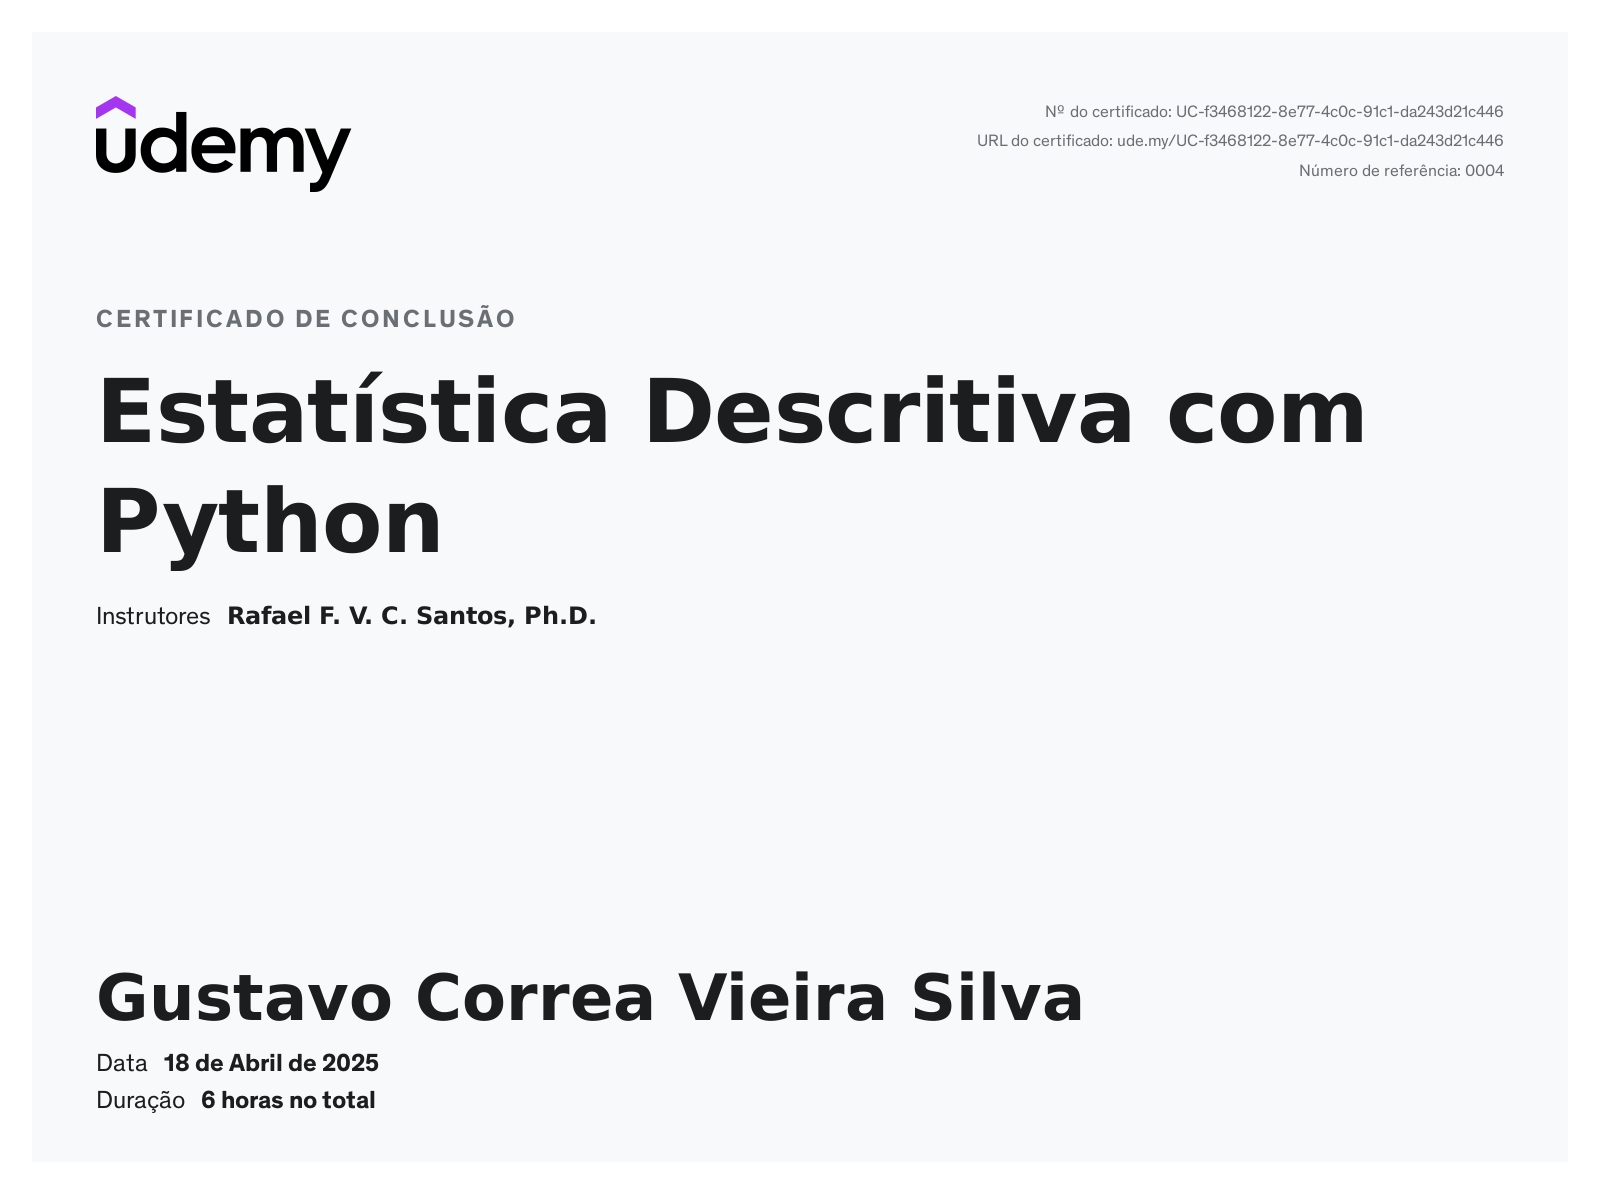

In [1]:
import cv2
from google.colab.patches import cv2_imshow

def imagem(caminho):
  imagem = cv2.imread(caminho)
  cv2_imshow(imagem)

# Meu certificado do curso
imagem('/content/certificado.jpg')

In [2]:
# Demais importações

!pip install bokeh_sampledata
from bokeh_sampledata.iris import flowers as dados_flores

from google.colab import files
import io

from random import randint
from math import sqrt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.4/208.4 kB 16.7 MB/s eta 0:00:00


# **Afinal, o que é Estatística?**

## Inicialmente, vamos conhecer alguns conceitos que fundamentam nossos estudos.

<br>

### Com base no glossário, define-se *Estatística* como:
> **ESTATÍSTICA:** *A ciência de coletar, analisar, interpretar e retirar conclusões a partir de dados.* <br><br> (ASSIS; SOUSA; DIAS, p. 258).

<br>

### Na introdução do livro 1, é enunciado algo semelhante em relação à *Inferência Estatística*:
> *A **inferência estatística** é uma das partes da Estatística. Esta é a parte da metodologia da Ciência que tem por objetivo a coleta, redução, análise e modelagem dos dados, a partir do que, finalmente, faz-se a inferência para uma população da qual os dados (a amostra) foram obtidos. Um aspecto importante da modelagem dos dados é fazer previsões, a partir das quais se podem tomar decisões.* <br><br> (MORETTIN; BUSSAB, p. 1).

<br>

### Ainda, no segundo capítulo do livro 2, podemos ter uma melhor compreensão sobre o que é a *Inferência Estatística*. Também é incluído um novo termo, a *Análise Exploratória de Dados*:
> *O ramo da Estatística conhecido como **Análise Exploratória de Dados** se ocupa da organização e resumo dos dados de uma amostra ou, eventualmente, de toda a população e o ramo conhecido como **Inferência Estatística** se refere ao processo de se tirar conclusões sobre uma população com base em uma amostra dela.* <br><br> (MORETTIN; SINGER, p. 23 e 24).

<br>

### Já em relação a *Estatística Descritiva*, gostaria de transcrever uma dentre várias definições presentes no glossário (escolhida pela semelhança com a noção apresentada no livro 3):
> **ESTATÍSTICA DESCRITIVA:** *Estatística descritiva refere-se a um conjunto de conceitos e métodos usados na organização, resumo, tabulação, representação e descrição de uma coleção de dados. O objetivo da estatística descritiva é fornecer uma representação dos dados que descrevem em forma numérica, gráfica ou tabular os resultados de pesquisa.* <br><br> (ASSIS; SOUSA; DIAS, p. 310).

<br>

### Veja que cada termo possuí uma forte relação com os demais. Assim, a primeira vista, é muito fácil gerar certa confusão e, por esse motivo, vou tentar explicá-los com minhas palavras.

<br>

### Acima de tudo, estamos ingressando na *Estatística*, uma Ciência própria que ocupa-se com a coleta, organização, análise, apresentação e modelagem de dados. Essas são algumas de suas fases (que podem variar dependendo do autor), e o nosso objetivo principal será fazer uso da *inferência estatística* a fim de inferir/conhecer/compreender aspectos de uma população (conjunto total dos dados da pesquisa) a partir de alguma amostra (subconjunto da população).

<br>

### Conforme prosseguir com a leitura das anotações, tão logo perceberá que o nosso foco inicial será a *Análise Exploratória de Dados*, que consiste no conjunto de técnicas estatísticas e gráficas utilizadas para entender as principais características dos dados, identificar padrões, encontrar anomalias (outliers), criar hipóteses, etc. Nela, incluí-se a *Estatística Descritiva*, ou o conjunto de técnicas destinadas a resumos numéricos (ex.: média) e gráficos diretos (ex.: histograma).

<br>

### Assim sendo, dada uma população do nosso interesse, geralmente utilizamos técnicas de amostragem para obtermos parte dos seus dados, a menos que já seja viável estudar a população como um todo. Daí, com essa amostra, é feita uma análise geral dos dados $-$ etapa onde surge a Análise Exploratória dos Dados $-$ para, enfim, podermos realizar a inferência estatística, "encerrando" finalmente o processo da pesquisa (passível de reavaliação).

<br>

### Veja a seguir um diagrama retirado da apresentação "ANÁLISE EXPLORATÓRIA E ESTATÍSTICA DESCRITIVA" (2012), do Instituto de Ciências Matemáticas e de Computação (ICMC-USP). Disponível em: http://wiki.icmc.usp.br/images/f/f3/Estatisticadescritiva2012.pdf

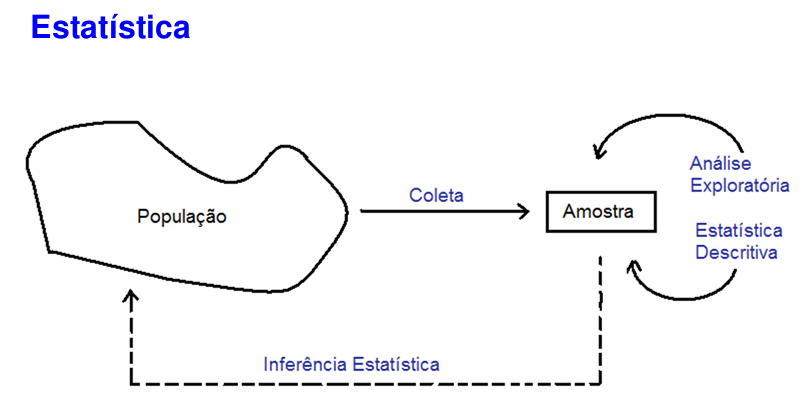

In [3]:
imagem('/content/diagrama.png') # Diagrama exibido na página 4

# **Tipos de Variáveis**

## Vamos admitir que tenha sido feita uma coleta de dados. Que tipos eles poderiam representar?

<br>

### Primeiramente, para fins de objetividade, usualmente vou definir alguns conceitos com minhas próprias palavras, mas, claro, sem perder o rigor. Isso será perceptível, pois não haverá referência explícita. (❗)

<br>

### Continuando, as variáveis $-$ quaisquer características de interesse da pesquisa associadas aos elementos de uma população $-$ podem ser de 2 tipos gerais:

<br>

1. *Variáveis Qualitativas*:
>  **VARIÁVEL QUALITATIVA:** *Variável de natureza analítica definida em termos de seus atributos, portanto não são mensuráveis, nem numéricas ou não contáveis, apenas são descritas, sendo o a condição qualitativa definida por escala. Conhecida também como **variável categórica**.* <br><br> (ASSIS; SOUSA; DIAS, p. 756).

#### Ex.: Sexo, educação, estado civil, etc.
#### As variáveis qualitativas podem ser subdivididas em *nominais* ou *ordinais*. A segunda diferencia-se pela existência de uma relação de ordem entre os resultados. A educação, por exemplo, é um caso em que os ensinos fundamental, médio e superior correspondem a uma ordenação definida pelo grau de instrução.

<br>

2. *Variáveis Quantitativas*:
>  **VARIÁVEL QUANTITATIVA:** *Quando os dados são de caráter nitidamente quantitativo, e o conjunto dos resultados possui uma estrutura numérica, trata-se, portanto da estatística de variável.* <br><br> (ASSIS; SOUSA; DIAS, p. 759).

#### Ex.: Número de filhos, salário, idade, etc.
#### Paralelamente, as variáveis quantitativas podem ser subdivididas em *discretas* ou *contínuas*. A grosso modo, os valores da primeira pertencem a $\mathbb{Z}$ (ex.: idade), enquanto os da segunda pertencem a $\mathbb{R}$ (ex.: salário).

<br>

### Em síntese, temos o seguinte esquema (recortado do livro 1):

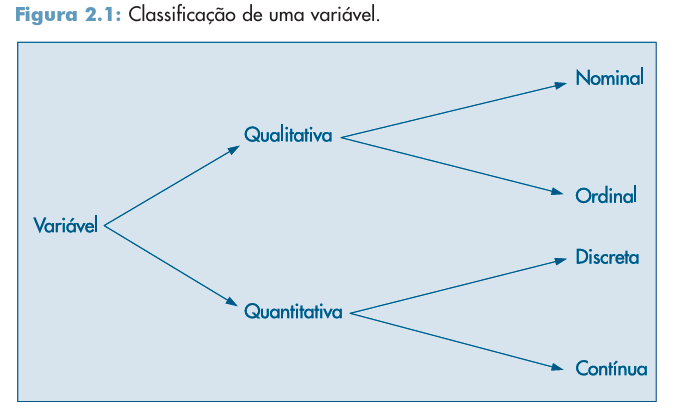

In [4]:
imagem("/content/figura2_1.png") # (MORETTIN; BUSSAB, p. 10)

# **Dados Brutos e Rol**

## Após a coleta dos dados, quais são as primeiras impressões que podemos ter sobre eles?

<br>

### Segundo o glossário, define-se *Dados Brutos* como:
> **DADOS BRUTOS**: *Dados na forma em que foram coletados, sem nenhum tratamento, ordenamento ou qualquer tipo de organização.* <br><br> (ASSIS; SOUSA; DIAS, p. 165).

In [5]:
# Exemplo de Dados Brutos
# Supõe-se que os dados a seguir sejam as notas dos alunos da turma X

notas = [randint(0, 10) for i in range(30)]
print(notas)

[3, 5, 4, 0, 2, 10, 3, 2, 5, 10, 2, 6, 3, 7, 6, 2, 4, 6, 2, 3, 1, 4, 9, 2, 4, 6, 3, 1, 3, 1]


<br>

### De igual modo, o glossário também a define o conceito de *Rol*:
> **ROL**: *É o arranjo dos dados brutos em ordem de frequência crescente ou decrescente.* <br><br> (ASSIS; SOUSA; DIAS, p. 624).

In [6]:
# Exemplo de Rol

notas.sort()
print(notas)

[0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 9, 10, 10]


<br>

### Percebe-se, portanto, que nada podemos concluir sobre os dados em seu estado bruto. Contudo, quando ordenamos ($↪$ Rol), somos capazes de descobrir quais seriam os valores máximos e mínimos (tratando-se de variáveis quantitativas), tal qual uma noção da distribuição de frequências dos dados.

# **Distribuição de Frequências, Tabelas e outros conceitos**

## Nesse tópico, vamos aprender a construir e identificar tabelas estatísticas.

<br>

### Antes de tudo, vamos definir o que é *Frequência*:
> *A **frequência** é o número de vezes que um valor aparece em um conjunto de dados. Ela pode ser **absoluta**, que é a contagem do número de vezes que cada valor ocorre, ou **relativa**, que é a proporção que cada valor representa em relação ao total.*

In [7]:
# Exemplo de Frequência
# Vamos usar o mesmo contexto das notas dos alunos da turma X

contador = 0

for i in notas:
  if i == 7:
    contador += 1

proporcao = contador/len(notas)

print(
    f'A nota sete aparece {contador} vezes numa lista com {len(notas)} notas. Logo:\n',
    f'\n- Frequência (ou Frequência Absoluta): {contador}.',
    f'\n- Frequência Relativa: {proporcao:.2f}.',
    f'\n- Frequência Relativa (%): {100*proporcao:.2f}.'
    )

A nota sete aparece 1 vezes numa lista com 30 notas. Logo:
 
- Frequência (ou Frequência Absoluta): 1. 
- Frequência Relativa: 0.03. 
- Frequência Relativa (%): 3.33.


<br>

### Outro tipo muito usado é a *Frequência Acumulada*, definida como:
> ***Frequência acumulada*** *é o somatório das frequências dos valores inferiores ou iguais ao valor dado.* <br><br> (CASTANHEIRA, p. 24).

In [8]:
# Exemplo de Frequência Acumulada (Relativa e Percentual)
# Ainda sob o mesmo contexto, agora faremos uso de uma tabela

# Definindo as frequências
absoluta = [notas.count(i) for i in range(0,11)]
relativa = [round(absoluta[i]/len(notas),3) for i in range(0,11)]
percentual = [round(100*relativa[i],4) for i in range(0,11)]
rel_acum = []

for i in range(0,11):
  if i == 0:
    acumulada = relativa[0]
  else:
      acumulada += relativa[i]
  rel_acum.append(acumulada)

per_acum = [round(100*rel_acum[i],4) for i in range(0,11)]

# Criando a tabela final
dados  = {
    'Absoluta': absoluta,
    'Relativa': relativa,
    'Percentual': percentual,
    'Rel. Acum.': rel_acum,
    'Per. Acum.': per_acum
}

df = pd.DataFrame(data=dados)

# As tabelas são constituídas de 3 partes (IMPORTANTE!)
print(
    'Tabela 1 - Notas dos alunos da turma X\n', # Cabeçalho
    '\n',
    df, # Corpo
    '\n',
    '\nFonte: dados fictícios gerados por computador.' # Rodapé
    )

Tabela 1 - Notas dos alunos da turma X
 
     Absoluta  Relativa  Percentual  Rel. Acum.  Per. Acum.
0          1     0.033         3.3       0.033         3.3
1          3     0.100        10.0       0.133        13.3
2          6     0.200        20.0       0.333        33.3
3          6     0.200        20.0       0.533        53.3
4          4     0.133        13.3       0.666        66.6
5          2     0.067         6.7       0.733        73.3
6          4     0.133        13.3       0.866        86.6
7          1     0.033         3.3       0.899        89.9
8          0     0.000         0.0       0.899        89.9
9          1     0.033         3.3       0.932        93.2
10         2     0.067         6.7       0.999        99.9 
 
Fonte: dados fictícios gerados por computador.


<br>

### Note que utilizamos uma tabela que apresenta todas as frequências de ocorrência de cada resultado (neste caso, as notas). Assim, esta é a chamada *Distribuição de Frequências*.

<br>

### Contudo, quando lidamos com uma quantidade de dados demasiadamente grande, é comum separá-los em *intervalos* ou *classes*. Supõe-se que desejamos fazer uma tabela com os resultados dos 50.000 candidatos ao vestibular de alguma universidade federal. Como as notas assumem, nesse caso, uma infinidade de valores, é conveniente agrupá-las em classes $-$ com base no livro 3, é recomendado sempre algo entre 5 e 20 classes.
### Ademais, pode ser interessante utilizar o [Método da Raíz Quadrada](https://www.youtube.com/watch?v=MA-CTyP69r0).

<br>

### Veja um exemplo de distribuição de frequências (recortado do livro 2):

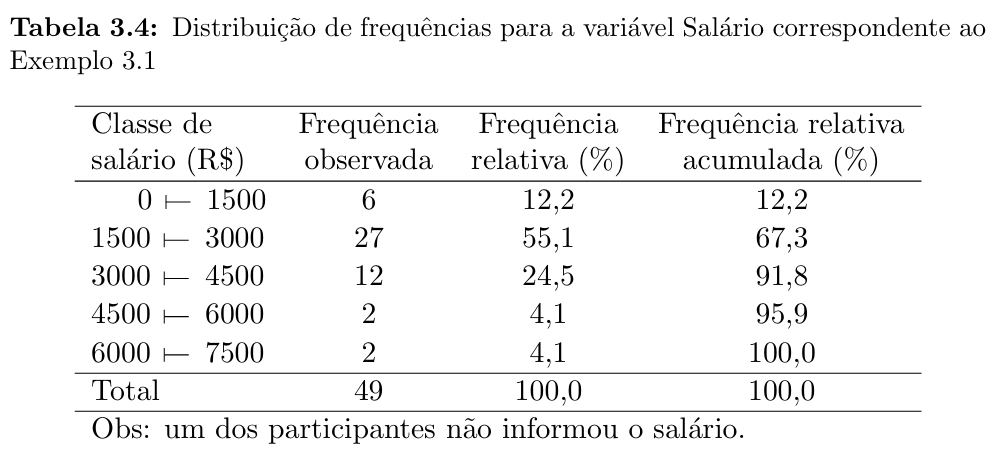

In [9]:
imagem("/content/tabela3_4.png") # (MORETTIN; SINGER, p. 48)

<br>

### Agora, vamos considerar uma classe $k$ qualquer.
### Sem nos perdermos nas definições, chamaremos o valor à esquerda de Limite Inferior da classe $k$, ou simplesmente $L_{I_k} \in k$. Analogamente, chamaremos o valor à direita de Limite Superior da classe $k$, denotado por $L_{S_k} \notin k$, salvo no caso em que o intervalo seja fechado no último limite.

<br>

### Dessa maneira, denominamos *Amplitude* de uma classe $k$ como sendo $A_k = L_{S_k} - L_{I_k}$.

<br>

### E, de igual modo, designa-se *Ponto Médio* de uma classe $k$ como sendo $P_{M_k} = \dfrac{L_{S_k} + L_{I_k}}{2}$.

<br>

### Exemplificando, vamos considerar a primeira classe ($k=1$) da tabela acima. Sua amplitude é $A_1 = 1500-0 = 1500$, enquanto seu ponto médio é calculado por $P_{M_1} = \dfrac{1500+0}{2} = \dfrac{1500}{2} = 750$. Isso é muito importante, pois assumimos que os 6 participantes que estão nesse intervalo recebem $750$ reais.

<br>

### Entretanto, ao tratar-se do ponto médio, devo salientar que atribuir um valor único para cada classe significa estar ciente de que um erro pode estar sendo inserido. De qualquer forma, usaremos esse método até que possamos refiná-lo em estudos futuros.

<br>

### Por fim, a razão entre a frequência absoluta e a amplitude de uma classe $k$ é denominada *Densidade de Frequência* e pode ser expressa pela fórmula $D_k = \dfrac{n_k}{A_k}$. Este conceito torna-se extremamente relevante quando trabalhamos com classes de amplitudes desiguais.

<br>

### No exemplo apresentado no livro 1, uma análise superficial baseada apenas nas frequências leva à conclusão equivocada de que a maior concentração de empresas possuí a faixa de $[40, 60)$ empregados. Porém, ao construir uma coluna com o valor das amplitudes e densidades por classe, percebemos que a faixa é na real de $[30, 40)$ empregados. Veja a tabela abaixo:

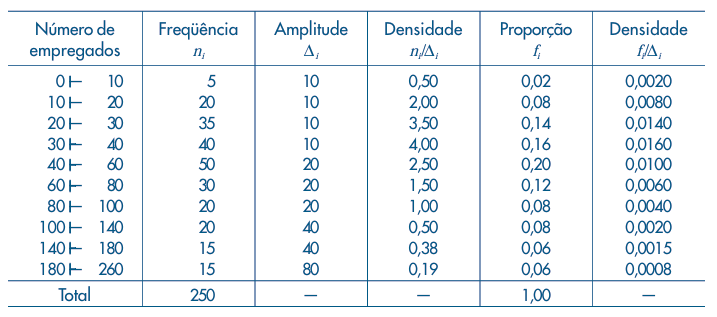

In [10]:
imagem("/content/densidade.png") # (MORETTIN; BUSSAB, p. 27)

<br>

### Para evitar possíveis interpretações equivocadas das tabelas, iremos complementá-las com representações gráficas. No próximo tópico, exploraremos os *Gráficos* e aprenderemos a construí-los utilizando Python.


# **Representações Gráficas**

## Quais tipos existem? Quando usá-las? E como construí-las?

<br>

### A partir de agora, vamos nos aprofundar nos *Gráficos*. Sem recorrer a uma definição formal, eles servem como complementos visuais na apresentação de dados em formato de tabela. Dessa forma, permitem uma visualização rápida e, muitas vezes, ajudam a gerar insights sobre o que estamos pesquisando.

<br>

### Todo gráfico, assim como as tabelas, possuí um **título**, um **corpo** e um **rodapé/fonte**. Embora existam vários deles, vamos verificar alguns principais e que podem ser facilmente criados com o Python.

In [11]:
uploaded = files.upload() # Uma fonte dos dados que vamos utilizar

Saving exercicio.xlsx to exercicio.xlsx


In [12]:
df_exercicio = pd.read_excel(io.BytesIO(uploaded['exercicio.xlsx']), sheet_name='dados') # Lê o arquivo carregado no Colab

In [13]:
df_exercicio.head() # Mostra as 5 primeiras linhas

,id,estcivil,instrucao,filhos,rsalario,anos,meses,regiao
0,1,1,0,NaN,4.00,26,3,0
1,2,2,0,1.0,4.56,32,10,1
2,3,2,0,2.0,5.25,36,5,1
3,4,1,1,NaN,5.73,20,10,2
4,5,1,0,NaN,6.26,40,7,2


In [14]:
df_exercicio.shape # (Linhas, Colunas)

(36, 8)

In [15]:
df_exercicio.isnull().sum() # Conferindo se existem valores ausentes (apenas na coluna 'filhos')

,0
id,0
estcivil,0
instrucao,0
filhos,16
rsalario,0
anos,0
meses,0
regiao,0


In [16]:
# Embora somente os solteiros possuam valores ausentes na coluna 'filhos',
# isso não significa que não tenham tido algum fiho (podem ser divorciados).
# Para fins didáticos, vamos supor que todo solteiro não tenha filhos.

df_exercicio = df_exercicio.fillna(0) # dados nulos -> 0
df_exercicio['filhos'] = df_exercicio['filhos'].astype('int') # float -> int
df_exercicio.isnull().sum() # Confere se foi preenchido (ok!)

,0
id,0
estcivil,0
instrucao,0
filhos,0
rsalario,0
anos,0
meses,0
regiao,0


In [17]:
df_exercicio.head() # Tudo pronto para começar os exemplos de gráficos

,id,estcivil,instrucao,filhos,rsalario,anos,meses,regiao
0,1,1,0,0,4.00,26,3,0
1,2,2,0,1,4.56,32,10,1
2,3,2,0,2,5.25,36,5,1
3,4,1,1,0,5.73,20,10,2
4,5,1,0,0,6.26,40,7,2


<br>

### **Gráfico de Barras/Colunas**

<br>

#### - Apropriado para representar os dados qualitativos, mas pode ser usado também para ilustrar dados quantitativos discretos;
#### - Caso os rótulos sejam grandes, é reecomendado usar o gráfico de barras.

In [18]:
filhos = df_exercicio['filhos'].value_counts()
print(filhos, type(filhos)) # Veja que lidamos com uma Série

filhos
0    20
2     7
1     5
3     3
5     1
Name: count, dtype: int64 <class 'pandas.core.series.Series'>


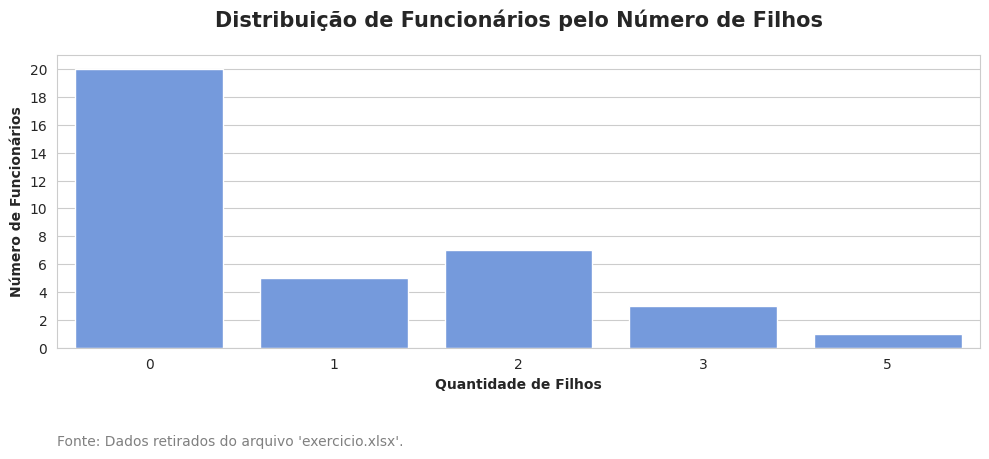

In [19]:
# Exemplo de Gráfico de Barras/Colunas
# sns.barplot() só aceita DataFrame

filhos = pd.DataFrame(filhos)  # Série -> DataFrame

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.yticks(range(0,filhos['count'].max()+1,2))

sns.barplot(
    data=filhos,
    x = 'filhos',
    y = 'count',
    color='cornflowerblue'
)

plt.title(
    'Distribuição de Funcionários pelo Número de Filhos',
    size=15, weight='bold', pad=20
    )
plt.xlabel('Quantidade de Filhos', size=10, weight='bold')
plt.ylabel('Número de Funcionários', size=10, weight='bold')

plt.text(
    x=-0.5, y=-7,
    s='Fonte: Dados retirados do arquivo \'exercicio.xlsx\'.',
    fontsize=10, color='gray'
    )

plt.tight_layout()
plt.show()

<br>

### **Gráfico de Setores**

<br>

#### - Ideal para comparar a proporção dos valores com o total;
#### - Também conhecido como gráfico de "pizza".

In [20]:
estcivil = df_exercicio['estcivil'].value_counts()
estcivil # Onde 2 é casado e 1 é solteiro

,count
estcivil,
2,20
1,16


In [21]:
estcivil = pd.DataFrame(estcivil)
estcivil.rename(index = {1:'Solteiro', 2:'Casado'}, inplace=True)
estcivil # Apenas renomeei com base no dicionário

,count
estcivil,
Casado,20
Solteiro,16


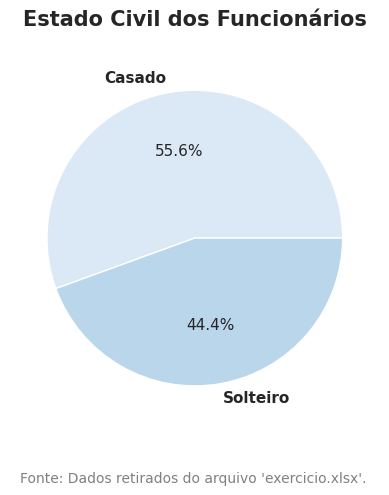

In [22]:
# Exemplo de Gráfico de Setores

palette_color = sns.color_palette('Blues')

patches, texts, autotexts = plt.pie(
    estcivil['count'], # plt.pie() não utiliza a sintaxe data
    labels=estcivil.index,
    colors=palette_color, # colors (e não color)
    autopct='%1.1f%%', # indica o valor percentual dos dados
    textprops={'fontsize':11}
)

for text in texts:
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontweight('normal')

plt.title('Estado Civil dos Funcionários', size=15, weight='bold', pad=20)

plt.text(
    x=-1.18, y=-1.65,
    s='Fonte: Dados retirados do arquivo \'exercicio.xlsx\'.',
    fontsize=10, color='gray'
    )

plt.show()

<br>

### **Histograma**

<br>

#### - Formado por um conjunto de retângulos justapostos;
#### - Usado para representar a distribuição de frequências onde os dados foram agrupados em intervalos de mesma amplitude.

In [33]:
anos = df_exercicio.loc[:,'anos'] # Selecionando apenas a coluna 'anos'

# Método da Raíz Quadrada
contagem_linhas = len(anos.index)
classes = int(round(sqrt(contagem_linhas), 0))

print('Número de Classes:', classes)

Número de Classes: 6


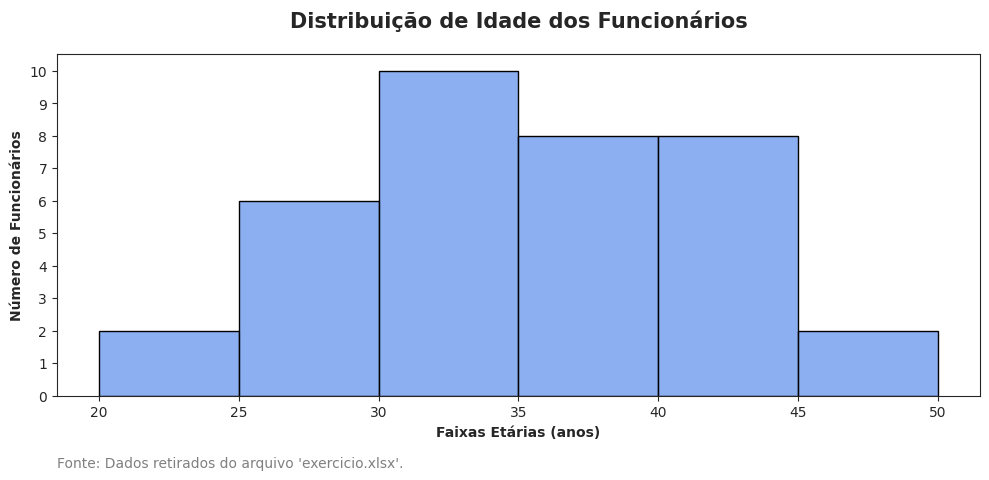

In [34]:
# Exemplo de Histograma

bins = [20,25,30,35,40,45,50]

sns.set_style('ticks')
plt.figure(figsize=(10, 5))
plt.yticks(range(11))
plt.xticks(bins)

sns.histplot(
    anos,
    bins=bins,
    edgecolor='black',
    color='cornflowerblue'
)

plt.title(
    'Distribuição de Idade dos Funcionários',
    size=15, weight='bold', pad=20
    )
plt.xlabel('Faixas Etárias (anos)', size=10, weight='bold')
plt.ylabel('Número de Funcionários', size=10, weight='bold')

plt.text(
    x=18.5, y=-2.2,
    s='Fonte: Dados retirados do arquivo \'exercicio.xlsx\'.',
    fontsize=10, color='gray'
    )

plt.tight_layout()
plt.show()

<br>

### E o mesmo vale para classes de amplitudes desiguais. Veja o exemplo (retirado do livro 1):

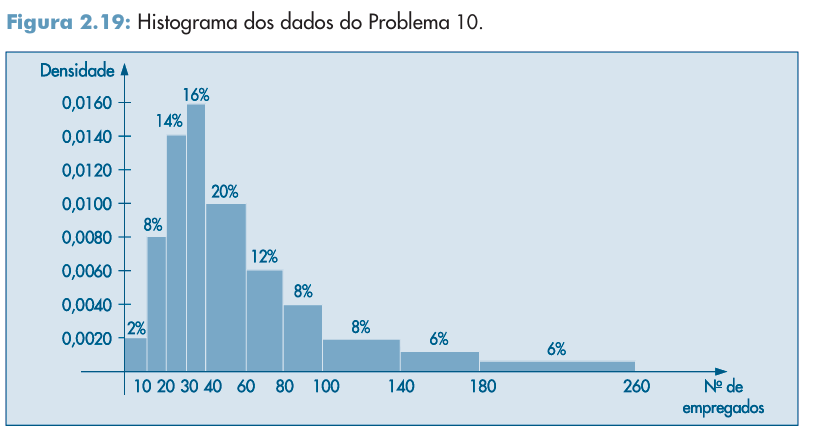

In [25]:
imagem('/content/figura2_19.png') # (MORETTIN; BUSSAB, p. 28)

<br>

### Reiterando, há uma infinidade de gráficos que podemos utilizar em nosso dia a dia, como o Gráfico de Linhas, o Pictograma, o Gráfico de Ramo-e-Folhas, entre outros. Acredito que o que vimos seja suficiente no momento.

<br>

### Sem mais delongas, retornaremos aos histogramas em tópicos posteriores.

# **Medidas de Tendência Central**

## Tais medidas descrevem, de alguma forma, o meio (ou o centro) dos dados.

In [26]:
print(dados_flores) # Outra fonte dos dados que vamos utilizar

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [27]:
# Renomeando as colunas para pt-br

dados_flores.rename(columns={
    'sepal_length': 'comp_sep', # Comprimento da sépala
    'sepal_width': 'larg_sep', # Largura da sépala
    'petal_length': 'comp_pet', # Comprimento da pétala
    'pepal_width': 'larg_pet', # Largura da pétala
    'species': 'especies' # Espécies das plantas
    }, inplace = True)

df_flores = dados_flores

print(df_flores)

     comp_sep  larg_sep  comp_pet  petal_width   especies
0         5.1       3.5       1.4          0.2     setosa
1         4.9       3.0       1.4          0.2     setosa
2         4.7       3.2       1.3          0.2     setosa
3         4.6       3.1       1.5          0.2     setosa
4         5.0       3.6       1.4          0.2     setosa
..        ...       ...       ...          ...        ...
145       6.7       3.0       5.2          2.3  virginica
146       6.3       2.5       5.0          1.9  virginica
147       6.5       3.0       5.2          2.0  virginica
148       6.2       3.4       5.4          2.3  virginica
149       5.9       3.0       5.1          1.8  virginica

[150 rows x 5 columns]


In [28]:
df_flores.isnull().sum() # Conferindo se existem valores ausentes (ok!)

,0
comp_sep,0
larg_sep,0
comp_pet,0
petal_width,0
especies,0


<br>

### Resumindo, lidaremos com 3 medidas principais: a *Média*, a *Moda* e a *Mediana*.
### Sejam $x_1, x_2, x_3, ..., x_n$ observações de uma variável $X$. Temos:

<br>

### **MÉDIA:**

<br>

* $\Large \overline{x} = \frac{x_1+x_2+...+x_n}{n} = \frac{1}{n} \displaystyle \sum_{i=1}^{n} x_i$

<br>

#### Temos também a média ponderada e a média de classes, onde a última é calculada pela soma dos produtos dos pontos médios com suas respectivas frequências (absoluta), dividida pela soma do total de frequências.

In [29]:
media = round(stats.mean(df_flores['comp_sep']),2)
print('O comprimento médio da sépala é:', media, 'cm')

O comprimento médio da sépala é: 5.84 cm


<br>

### **MODA:**

<br>

#### Representa o valor mais frequente em uma distribuição de dados. Ex.: Se temos o conjunto de dados $\{1,2,3,3,5,8,8,8\}$, sua moda é o valor $8$, pois é ele que aparece mais vezes.

<br>

#### Para dados agrupados em intervalos:
##### (primeiro encontramos a classe modal $k$)

<br>

* $\Large \text{mo(X)} = L_{I_k} + \frac{f_{post}·A_k}{f_{ant}+f_{post}}$

In [37]:
# mode ou multimode, pois poderia ser mais de uma moda
moda = stats.multimode(df_flores['comp_sep']) # retorna uma lista

if len(moda) == 1:
  i = round(float(moda[0]),2)
  print('O comprimento mas frequente da sépala é:', i, 'cm')
else:
  print('Temos mais de uma moda ou lidamos com uma variável amodal.')

O comprimento mas frequente da sépala é: 5.0 cm


<br>

### **MEDIANA:**

<br>

#### Em Rol, divide os dados na metade ($50\%$ à esquerda e $50\%$ à direita), ocupando a posição central.
####É definida em termos das estatísticas de ordem $x_{(1)}\le x_{(2)}\le ...\le x_{(n)}$.

<br>

*   $\large \text{md}(X) =
\begin{cases}
x_{\left(\frac{n+1}{2}\right)}, & \text{se } n \text{ ímpar}; \\ \\
\displaystyle \frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2}, & \text{se } n \text{ par}.
\end{cases}$

<br>

#### Para dados agrupados em intervalos:
##### (primeiro, determinamos o tamanho $n$ da amostra e o valor $\dfrac{n}{2}$, sem importar se $n$ é par ou ímpar, e identificamos a classe $k$ onde está a mediana)

<br>

* $\Large \text{md(X)} = L_{I_k} + A_k · \displaystyle \frac{(\dfrac{n}{2} -\sum f_{ant})}{f_k}$

In [31]:
mediana = round(stats.median(df_flores['larg_sep']),2)
print('O comprimento mediano da sépala é:', mediana, 'cm')

O comprimento mediano da sépala é: 3.0 cm


# **Medidas de Posição**

## Tais medidas indicam a posição de um determinado valor dentro do conjunto de dados.

<br>

### Em primeiro lugar, devemos saber o que é um *Quantil*:
> **QUANTIL (QUANTILE):** *Corresponde a n-ésima parte de um conjunto de dados. Tipos específicos de quantis incluem os decis, percentis e quartis.* <br><br> (ASSIS; SOUSA; DIAS, p. 588).

<br>

### Uma outra definição presente no glossário pode ser:
> **QUANTIS:** *O conjunto de $n-1$ valores de uma variável que a divide em um número $n$ de iguais proporções. Por exemplo, $n-1=3$ valores divide os dados em quatro quantis, com o valor central geralmente chamado de mediana e os valores inferior e superior geralmente chamados de quartis inferior e superior, respectivamente.* <br><br> (ASSIS; SOUSA; DIAS, p. 589).

<br>

### Na verdade, o glossário fornece até 4 definições para a palavra *Quantil*. Todavia, vamos nos atentar a 2 principais tipos de quantis (suficientes para nossos estudos), que são os *quartis* e os *percentis*.

<br>

### Prosseguindo, acredito que o livro 3 apresenta uma excelente explicação sobre o que cada um desses quantis representa. Leia com atenção:
> *Os **QUARTIS** permitem dividir a distribuição em quatro partes iguais, ou seja, com o mesmo número de elementos. Assim, os **DECIS** dividem a distribuição em dez partes iguais e os **PERCENTIS** em cem partes iguais.*  <br><br> (CASTANHEIRA, p. 72).

<br>

### Dessa maneira, o primeiro quartil $Q_1$ é o mesmo que o vigésimo quinto percentil $p_{25}$, a mediana é o segundo quartil $Q_2 = p_{50}$, e o terceiro quartil $Q_3 = p_{75}$. Para encontrá-los $-$ tendo em vista que já sabemos calcular a mediana $Q_1$ $-$ basta saber que $Q_1$ é a mediana dos valores à esquerda de $Q_2$, e, analogamente, $Q_3$ é a mediana dos valores à direita de $Q_2$.

<br>

### No Python, determinar os quartis é considerado uma tarefa trivial:

In [41]:
df_flores['comp_sep'].describe().round(1) # 5.1, 5.8, 6.4

,comp_sep
count,150.0
mean,5.8
std,0.8
min,4.3
25%,5.1
50%,5.8
75%,6.4
max,7.9


# **Medidas de Posição**

## Sobre o quanto os valores estão dispersos/afastados em relação à média ou à mediana.

<br>

### A princípio, temos a *Amplitude Total*: $máx - mín$ de um conjunto de dados ou, se tratando de intervalos, $P_{M_{máx}}-P_{M_{mín}}$; e o *Desvio Quartil*: $D_q = \dfrac{Q_3-Q_1}{2}$. Tão logo percebe-se que o *desvio quartil* não é afetado pelos valores extremos da série, sendo, portanto, útil quando os *outliers* não forem representativos.

<br>

### Como a soma de todos os desvios em relação à média é sempre igual a zero (convido o leitor a demonstrar tal propriedade), quais ferramentas matemáticas poderíamos utilizar para analisar a dispersão desses desvios ao redor da média? As respostas: o módulo e a elevação ao quadrado.

<br>

### Assim, para cada ferramenta, temos as medidas *Desvio Médio* e *Desvio Padrão*, respectivamente.

<br>

### **DESVIO MÉDIO:**

<br>

* $\Large \text{Dm} = \dfrac{\sum \left| x_i - \overline{x} \right| · f_i}{\sum f}$

<br>

#### Para dados agrupados em classes, substitui-se $x_i$ pelo ponto médio de cada intervalo.

In [58]:
desvio_medio = stats.mean(np.abs(dados_flores['comp_sep'] - media))
print('Desvio médio:', round(desvio_medio,2))

Desvio médio: 0.69


<br>

### **DESVIO PADRÃO:**

<br>

* $\Large \text{Dp} = \sqrt{\dfrac{\sum ( x_i - \overline{x} )^2 · f_i}{\sum f}}$

<br>

#### É importante destacar que o desvio padrão é derivado do cálculo da *variância*, sendo esta definida como o quadrado do desvio padrão.

In [57]:
# Desvio padrão populacional dos dados -> stats.pstdev
# Desvio padrão amostral dos dados -> stats.stdev

# Variância populacional dos dados -> pvariance()
# Variância amostral dos dados -> variance()

# Estamos lidando com amostras, logo:

desvio_padrao = stats.stdev(dados_flores['comp_sep'])
variancia = stats.variance(dados_flores['comp_sep'])

print(
    'Desvio padrão:', round(desvio_padrao,2),
    '\nVariância:', round(variancia,2)
    )

Desvio padrão: 0.83 
Variância: 0.69
